In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [56]:
employed_by_sex_districts = pd.read_csv('../data/RV_O_047_L_OK_SK.CSV', delimiter=';')
employed_by_sex_regions = pd.read_csv('../data/RV_O_047_R_KR_SK.CSV', delimiter=';')
employed_by_sex_economical_regions = pd.read_csv('../data/RV_O_047_R_OL_SK.CSV', delimiter=';')
employed_by_sex_slovakia = pd.read_csv('../data/RV_O_047_R_SR_SK.CSV', delimiter=';')

population_by_sex_slovakia = pd.read_csv('../data/RV_O_010_R_SR_SK.CSV', delimiter=';')

In [54]:
employed_by_sex_slovakia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13531 entries, 0 to 13530
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Kód štátu                    13531 non-null  object
 1   Názov štátu                  13531 non-null  object
 2   Pohlavie                     13531 non-null  object
 3   5-ročné vekové skupiny       13531 non-null  object
 4   Vzdelanie                    13531 non-null  object
 5   Zamestnanie (ISCO - triedy)  13531 non-null  object
 6   abs.                         13531 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 740.1+ KB


In [24]:
employee_by_age = employed_by_sex_slovakia.groupby('5-ročné vekové skupiny')['abs.'].sum()

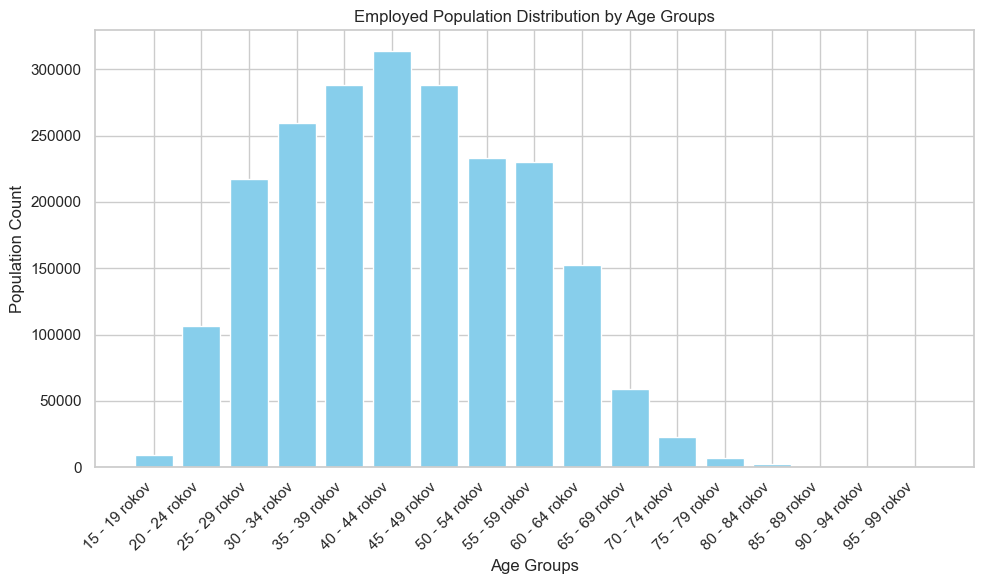

In [94]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
plt.bar(employee_by_age.index, employee_by_age.values, color='skyblue')
plt.xlabel('Age Groups')
plt.ylabel('Population Count')
plt.title('Employed Population Distribution by Age Groups')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

In [63]:
sex_sk = population_by_sex_slovakia[population_by_sex_slovakia['Ekonomické vekové skupiny'] != 'predproduktívny vek (0-14 rokov)'].groupby(
    'Pohlavie')['abs.'].sum()

In [64]:
sex_sk

Pohlavie
muž     2221100
žena    2360760
Name: abs., dtype: int64

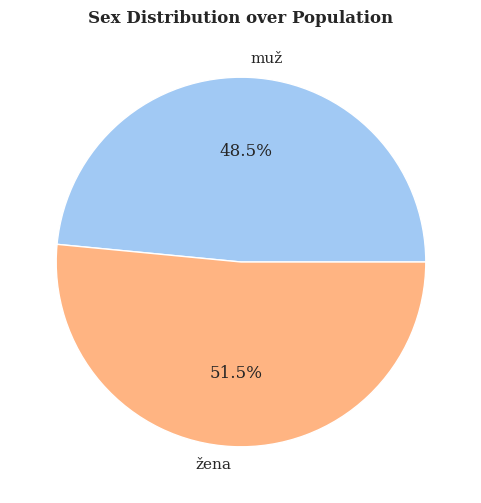

In [85]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.rcParams['font.family'] = 'serif'
colors = sns.color_palette('pastel')[:2]

plt.figure(figsize=(6,6))
plt.pie(x=sex_sk.values, labels=sex_sk.index, autopct='%1.1f%%', colors = colors)
plt.title('Sex Distribution over Population', fontweight='bold')
plt.show()

In [88]:
sex_emplyee_sk = employed_by_sex_slovakia.groupby('Pohlavie')['abs.'].sum()
sex_emplyee_sk

Pohlavie
muž     1108975
žena    1079661
Name: abs., dtype: int64

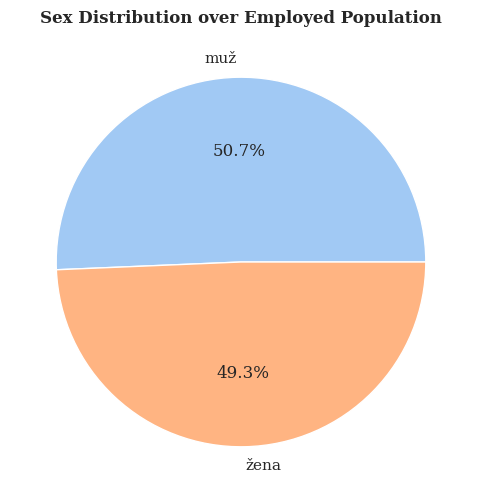

In [92]:
sns.set_style("whitegrid")
sns.set_context("notebook")
plt.rcParams['font.family'] = 'serif'
colors = sns.color_palette('pastel')[:2]

plt.figure(figsize=(6,6))
plt.pie(x=sex_emplyee_sk.values, labels=sex_emplyee_sk.index, autopct='%1.1f%%', colors = colors)
plt.title('Sex Distribution over Employed Population', fontweight='bold')
plt.show()